# Dont do stupid stuff

In [1]:
import os
import sys

import numpy as np
import pandas as pd
from sklearn.datasets import (make_friedman1,
                              make_friedman2,
                              make_friedman3)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

note_dir = os.getcwd()
root_dir = os.path.dirname(note_dir)
sys.path.append(root_dir)

import bonsai
from bonsai.base import *
from bonsai.utils.visuals import (plot_corr,
                                  plot_summary_grid)

## Dataset.

In [2]:
# Synthetic DataSet using sklearn
X_1, y_1 = make_friedman1(n_samples=10**4, n_features=5, noise=1.0) 
X_2, y_2 = make_friedman1(n_samples=10**4, n_features=5, noise=1.0) 

X_2 += 0.25
y_2 += 30 # Bimodal Outcome


X = np.concatenate((X_1, X_2))
y = np.concatenate((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
df = pd.DataFrame(X_train)
df = df.assign(y=y_train)
df.head()

,0,1,2,3,4,y
0,0.605244,1.012818,0.350162,1.056401,0.901132,51.636844
1,1.047779,0.818382,0.966189,0.268912,0.575119,43.317474
2,0.634436,0.568378,0.998516,0.756823,0.485575,25.152292
3,0.317961,0.983110,0.939764,0.095333,0.434698,14.085653
4,1.247169,0.269475,1.010474,0.747358,0.738865,39.092343


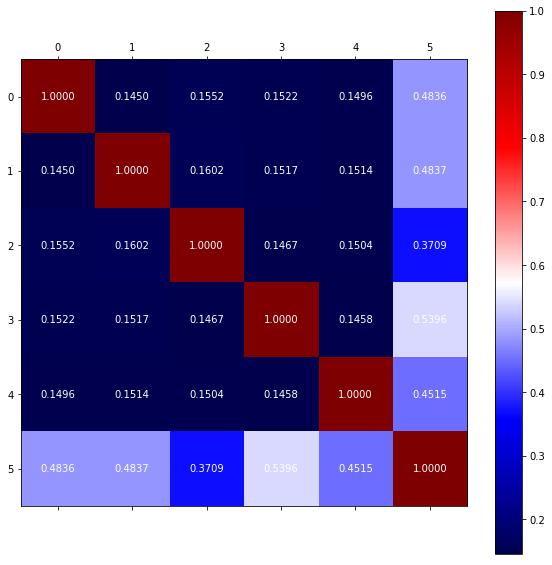

In [4]:
corr = df.corr().values
plot_corr(corr)

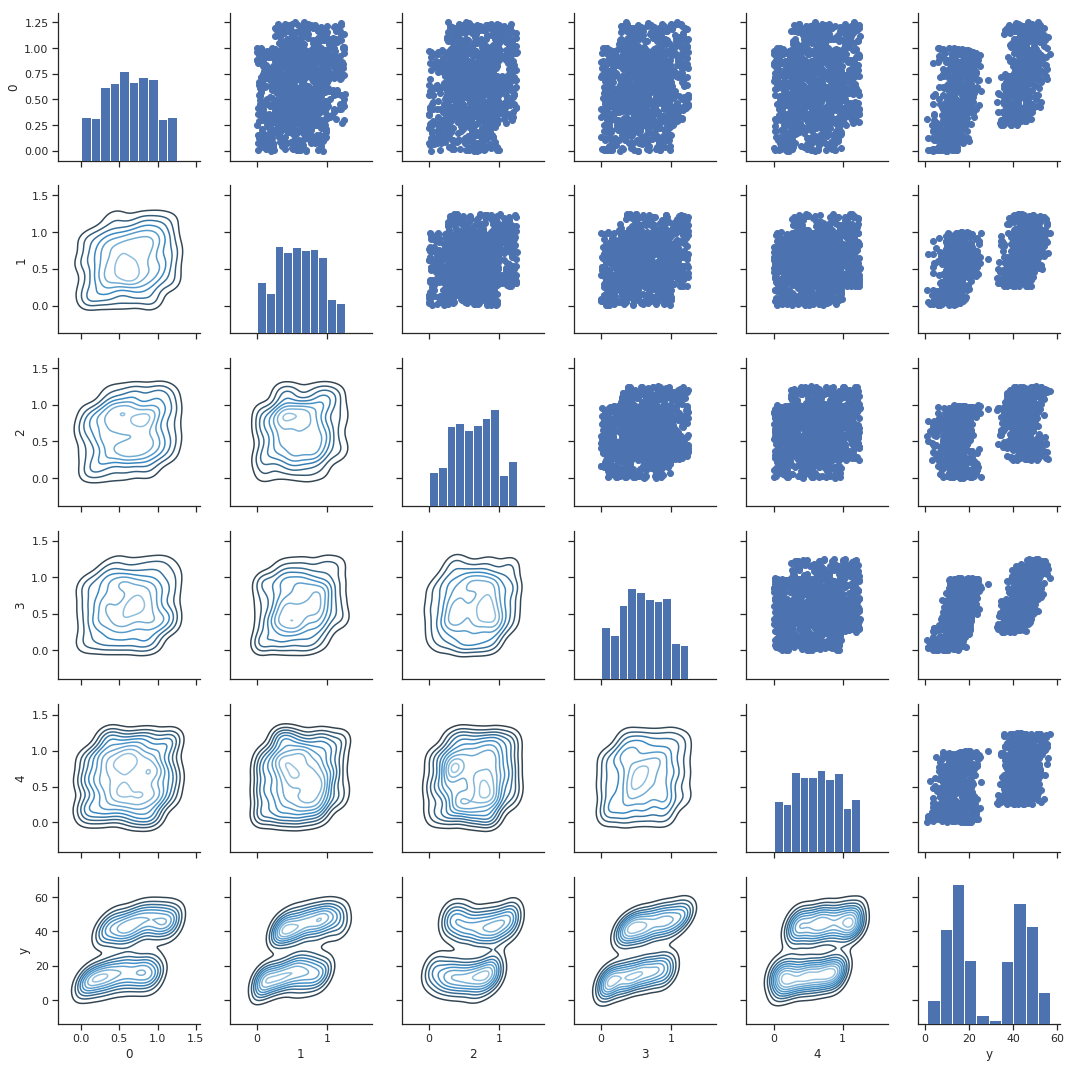

In [5]:
plot_summary_grid(df)

## Learn Tree

In [6]:
# Initialize
max_depth=6
c45tree = RegTree(max_depth=max_depth )

# Fit
c45tree.fit(X_train, y_train)

# Predict
c45_pred = c45tree.predict(X_test)

rmse_original = np.sqrt(np.mean((y_test - c45_pred)**2))
rmse_original

9.05527456230358

The ideal outcome, bimodal so our tree does not learn this


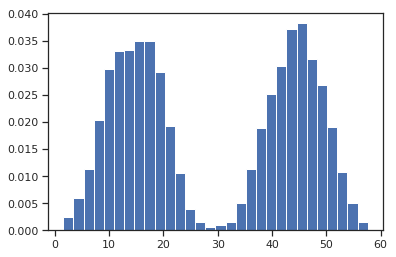

In [7]:
plt.hist(y_test, 30, density=True)
print("The ideal outcome, bimodal so our tree does not learn this")
plt.show()

C45 shows a spectrum of outcomes that at least shows the bimodal outcome


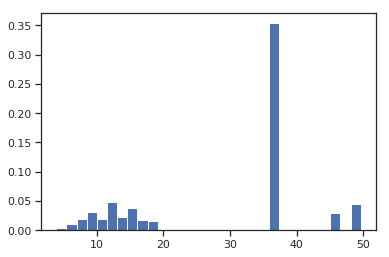

In [8]:
plt.hist(c45_pred, 30, density=True)
print("C45 shows a spectrum of outcomes that at least shows the bimodal outcome")
plt.show()

## Calculate Histograms

For each leaf, we need a histogram

In [9]:
c45tree.tree_ind

array([[ -1,   3,   0,   1,   2,  -1],
       [ -1,   0,   0,   3,   4,  -1],
       [ -1,   1,   0,  11,  12,  -1],
       [ -1,   1,   0,  25,  26,  -1],
       [ -1,   1,   0,   5,   6,  -1],
       [ -1,   4,   0,  55,  56,  -1],
       [ -1,   4,   0,   7,   8,  -1],
       [ -1,   1,   0,  69,  70,  -1],
       [ -1,   3,   0,   9,  10,  -1],
       [  1,  -1,  -1,  -1,  -1,   0],
       [ -1,   1,   0,  75,  76,  -1],
       [ -1,   3,   0,  13,  14,  -1],
       [ -1,   0,   0,  19,  20,  -1],
       [ -1,   4,   0,  77,  78,  -1],
       [ -1,   4,   0,  15,  16,  -1],
       [ -1,   2,   0,  91,  92,  -1],
       [ -1,   0,   0,  17,  18,  -1],
       [ -1,   3,   0,  97,  98,  -1],
       [  1,  -1,  -1,  -1,  -1,   1],
       [ -1,   3,   0,  99, 100,  -1],
       [ -1,   4,   0,  21,  22,  -1],
       [ -1,   3,   0, 113, 114,  -1],
       [ -1,   3,   0,  23,  24,  -1],
       [  1,  -1,  -1,  -1,  -1,   2],
       [ -1,   1,   0, 119, 120,  -1],
       [ -1,   4,   0,  2

In [10]:
c45tree.tree_val

array([[ 0.24914731, -1.        ],
       [ 0.36138076, -1.        ],
       [ 0.24905732, -1.        ],
       [ 0.33205213, -1.        ],
       [ 0.25393937, -1.        ],
       [ 0.43458261, -1.        ],
       [ 0.64940008, -1.        ],
       [ 0.41992898, -1.        ],
       [ 0.05876832, -1.        ],
       [-1.        , 13.29965424],
       [ 0.3906367 , -1.        ],
       [ 0.61037922, -1.        ],
       [ 0.24913059, -1.        ],
       [ 0.64940008, -1.        ],
       [ 0.59569571, -1.        ],
       [ 0.20023225, -1.        ],
       [ 0.54683758, -1.        ],
       [ 0.73241703, -1.        ],
       [-1.        , 16.69662216],
       [ 0.62502375, -1.        ],
       [ 0.24905842, -1.        ],
       [ 0.57132712, -1.        ],
       [ 1.0009002 , -1.        ],
       [-1.        , 35.92757062],
       [ 0.63962112, -1.        ],
       [ 0.5273447 , -1.        ],
       [ 0.2052066 , -1.        ],
       [ 0.78126481, -1.        ],
       [ 0.86915209,

In [11]:
help(c45tree.predict)

Help on method predict in module bonsai.core.bonsaic:

predict(X, output_type='response') method of bonsai.base.regtree.RegTree instance
    Predict y by applying the trained tree to X.
    
    Args:
        X:
        output_type:    str, default="response"
                        - response: Function yields predicted value
                        - index:    Function yields indices of nodes.
    
    Returns:



In [12]:
out = c45tree.predict(X_test, output_type="index")

In [13]:
np.unique(out).astype(int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [14]:
c45tree.get_histograms(X_train, y_train)

In [15]:
c45tree.histograms

[(array([ 2,  2,  4,  8, 14, 18, 15, 10,  2,  1]),
  array([ 5.06470247,  6.61425923,  8.163816  ,  9.71337276, 11.26292953,
         12.81248629, 14.36204306, 15.91159982, 17.46115659, 19.01071335,
         20.56027012])),
 (array([ 4, 13, 19, 28, 35, 31, 16,  9,  4,  3]),
  array([10.50453175, 11.8791923 , 13.25385284, 14.62851339, 16.00317394,
         17.37783448, 18.75249503, 20.12715557, 21.50181612, 22.87647666,
         24.25113721])),
 (array([  80,  752, 1314,  395,   62,  964, 2343, 2021,  634,   25]),
  array([ 6.47415734, 11.8107593 , 17.14736127, 22.48396323, 27.8205652 ,
         33.15716716, 38.49376912, 43.83037109, 49.16697305, 54.50357502,
         59.84017698])),
 (array([2, 1, 3, 4, 2, 6, 2, 3, 1, 1]),
  array([4.13321999, 4.64898183, 5.16474366, 5.68050549, 6.19626733,
         6.71202916, 7.22779099, 7.74355283, 8.25931466, 8.77507649,
         9.29083833])),
 (array([ 5,  6, 13,  9, 14, 20,  9,  4,  5,  1]),
  array([1.01626952, 1.64960041, 2.2829313 , 2.9162621

## Calculate Kernel Density

In [16]:
c45tree.get_kdes(X_train, y_train, kernel="gaussian")

In [17]:
c45tree.kdes

[KernelDensity(algorithm='auto', atol=0, bandwidth=0.42056902296500737,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.36149059039923287,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.16338093128054065,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.5253055608807534,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.4102988594838211,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0

In [18]:
c45_probas = c45tree.predict_proba(X_test, y_test)

(17,)
(29,)
(2157,)
(10,)
(17,)
(5,)
(7,)
(5,)
(19,)
(4,)
(9,)
(21,)
(21,)
(25,)
(19,)
(11,)
(1,)
(21,)
(3,)
(12,)
(1,)
(14,)
(8,)
(12,)
(6,)
(17,)
(9,)
(18,)
(105,)
(24,)
(13,)
(55,)
(32,)
(40,)
(37,)
(21,)
(10,)
(32,)
(15,)
(6,)
(12,)
(10,)
(49,)
(29,)
(17,)
(26,)
(59,)
(25,)
(28,)
(30,)
(30,)
(36,)
(24,)
(68,)
(33,)
(56,)
(26,)
(98,)
(179,)
(277,)


In [19]:
np.min(c45_probas), np.max(c45_probas), np.mean(c45_probas)

(4.024807285522936e-12, 0.3341529417450781, 0.06837259187225954)

Probabilities of the test set


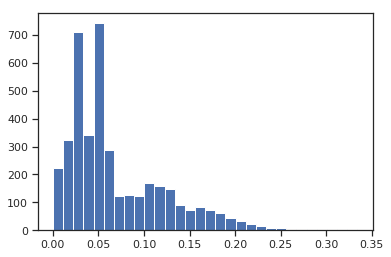

In [20]:
plt.hist(c45_probas, 30)
print("Probabilities of the test set")
plt.show()

In [21]:
x = np.zeros((100,2))
x.shape

(100, 2)

In [22]:
x.reshape(-1,1).shape

(200, 1)

In [23]:
np.atleast_2d(y).T

array([[23.71626727],
       [16.01560379],
       [10.48058299],
       ...,
       [44.14420589],
       [40.84713145],
       [51.56246551]])

In [24]:
y.reshape(-1,1).shape

(20000, 1)